<a href="https://colab.research.google.com/github/ivanalarconq/Generative_Salud/blob/main/Clase_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![banner](https://portal.insnsb.gob.pe/investigacion/wp-content/uploads/IA_AVANZADO_3.png)


In [ ]:
# @title Instalación de Librerías
# 🛠️ INSTALACIÓN DE LIBRERÍAS (Ejecutar esto primero en Google Colab)
# Aunque Colab ya trae la mayoría, esto asegura que tengamos todo listo.
!pip install pandas numpy matplotlib opencv-python

# 🩺 Clase 0: Fundamentos de Datos para Inteligencia Artificial en Salud

**INSTITUTO NACIONAL DE SALUD DEL NIÑO SAN BORJA**

__Creadores de Contenido:__ Sebastian Puruguay

__Revisor de Contenido:__ Carlos Vasquez

__Instructores:__ Carlos Vasquez, Sebastian Puruguay

### 🎯 Objetivos de la Clase

Al finalizar esta sesión, los participantes serán capaces de:
1.  Comprender la diferencia entre **datos estructurados y no estructurados** en el contexto médico.
2.  Manipular datasets clínicos utilizando **Python y Pandas**.
3.  Analizar imágenes médicas a nivel de píxeles con **OpenCV**.
4.  Realizar extracción básica de información en textos clínicos (**NLP**).

---

### 📋 Agenda Técnica
0.  **Nivelación Técnica**: Crash Course de Python (Tipos, Lógica, Funciones).
1.  **El Paradigma del Iceberg**: Datos Estructurados vs. No Estructurados.
2.  **Pipeline de Datos Real**: Ingesta y manipulación de datasets clínicos.
3.  **Visión Computacional Aplicada**: Análisis histogramático y segmentación de imágenes médicas reales.
4.  **Introducción a NLP**: Extracción de información en diálogos Médico-Paciente.
5.  **Taller Práctico Autoguiado**: Ejercicios de consolidación (Opcional).

---

## 0. Nivelación Técnica: Python para Ciencia de Datos

Antes de correr algoritmos complejos, necesitamos dominar la herramienta base. Python es el lenguaje estándar en IA.

### 0.1 Tipos de Datos Primitivos
La unidad mínima de información.

In [ ]:
# A. Variables Numéricas
edad = 45                   # Integer (Entero)
temperatura = 37.5          # Float (Decimal)

# B. Texto (Strings)
nombre_paciente = "Juan Pérez"
diagnostico = "Hipertensión Arterial Grado 1"

# C. Lógica (Booleans)
tiene_fiebre = True
es_urgencia = False

print(f"Paciente: {nombre_paciente} | Edad: {edad} | ¿Fiebre?: {tiene_fiebre}")

Paciente: Juan Pérez | Edad: 45 | ¿Fiebre?: True


### 0.2 Estructuras de Datos Compuestas
Cómo organizamos grandes volúmenes de información.

In [ ]:
# A. Listas (Secuencias ordenadas)
# Útil para series de tiempo, colas de espera, lista de medicamentos.
signos_vitales = [80, 82, 85, 90, 88]
medicamentos = ["Paracetamol", "Ibuprofeno", "Amoxicilina"]

print(f"Primer medicamento: {medicamentos[0]}")
print(f"Último signo vital: {signos_vitales[-1]}")

# B. Diccionarios (Clave-Valor / JSON)
# Estándar para Historias Clínicas Electrónicas (HCE) e interoperabilidad (FHIR).
historia_clinica = {
    "id": "ABC-123",
    "nombre": "Maria Lopez",
    "alergias": ["Penicilina", "Nueces"],
    "seguro_activo": True
}

print(f"Alergia principal: {historia_clinica['alergias'][0]}")

Primer medicamento: Paracetamol
Último signo vital: 88
Alergia principal: Penicilina


### 0.3 Control de Flujo (Lógica Clínica)
Instrucciones `if` (si pasa esto...) y bucles `for` (para cada paciente...).

In [ ]:

if 1 > 0:
  print("Es mayor")
else:
  print("No es mayor")

Es mayor


In [ ]:
# CONDICIONALES: Triaje Automático
saturacion = 88

if saturacion < 90:
    print("⚠️ ALERTA: Hipoxia Sevrea. Iniciar Oxígeno.")
elif saturacion < 95:
    print("⚠️ PRECAUCIÓN: Monitorear.")
else:
    print("✅ Saturación normal.")

# BUCLES: Procesamiento Masivo
pacientes_espera = ["Ana", "Luis", "Pedro", "Rosa"]

print("\n--- LLAMANDO A CONSULTORIO ---")
for p in pacientes_espera:
    print(f"> Llamando a paciente: {p}...")

⚠️ ALERTA: Hipoxia Sevrea. Iniciar Oxígeno.

--- LLAMANDO A CONSULTORIO ---
> Llamando a paciente: Ana...
> Llamando a paciente: Luis...
> Llamando a paciente: Pedro...
> Llamando a paciente: Rosa...


In [ ]:
lista = [1,2,3]
for i in lista:
  print(i)

1
2
3


### 0.4 Funciones (Modularidad)
En programación profesional, no repetimos código. Creamos funciones reutilizables.

In [ ]:
def calcular_imc(peso_kg, altura_m):
    """Calcula el Índice de Masa Corporal."""
    imc = peso_kg / (altura_m ** 2)
    return round(imc, 2)

# Uso de la función
peso_actual = 75
altura_actual = 1.75

resultado = calcular_imc(peso_actual, altura_actual)
print(f"El IMC calculado es: {resultado}")

El IMC calculado es: 24.49


### 0.5 Librerías Científicas (El Stack de Data Science)
No reinventamos la rueda. Usamos herramientas probadas:
*   **Pandas**: Excel con esteroides. Manipulación de tablas.
*   **Numpy**: Cálculo matemático matricial.
*   **Matplotlib**: Visualización gráfica.
*   **OpenCV**: Visión artificial.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2  # OpenCV
import os
import urllib.request

print("✅ Librerías importadas correctamente. Entorno listo.")

✅ Librerías importadas correctamente. Entorno listo.


---
## 1. El Iceberg de los Datos en Salud

En la práctica clínica, se estima que el **80% de los datos generados son no estructurados**. Esto representa un desafío monumental para la analítica tradicional, pero una oportunidad de oro para la IA Generativa.

*   **Datos Estructurados (20%)**: Bases de datos SQL, Excel, CSV. Fáciles de tabular.
*   **Datos No Estructurados (80%)**: Notas clínicas, imágenes (DICOM), señales (ECG), audio.

Visualicemos esta disparidad:

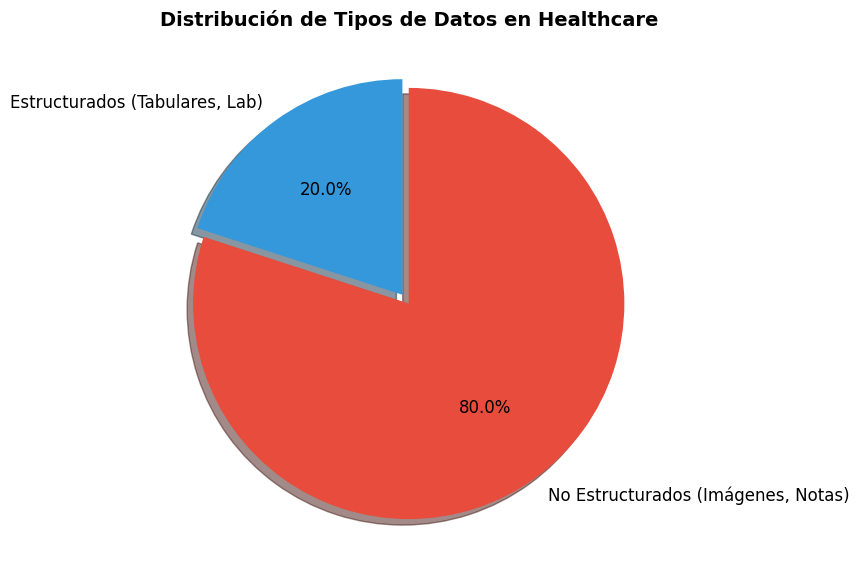

In [ ]:
# Visualización de la distribución de datos
labels = ['Estructurados (Tabulares, Lab)', 'No Estructurados (Imágenes, Notas)']
sizes = [20, 80]
colors = ['#3498db', '#e74c3c']
explode = (0.05, 0)

plt.figure(figsize=(7, 7))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', colors=colors,
        startangle=90, textprops={'fontsize': 12}, shadow=True)
plt.title('Distribución de Tipos de Datos en Healthcare', fontsize=14, fontweight='bold')
plt.show()

---
## 2. Ingesta y Análisis de Datos Estructurados

Simularemos la extracción de un dataset de triaje de urgencias. Utilizaremos `pandas`, la herramienta estándar en la industria para manipulación tabular.

In [ ]:
# GENERACIÓN DE DATASET SINTÉTICO (ETL Simulado)
# Creamos un CSV en local para simular la descarga de una base de datos

csv_data = """ID_Paciente,Edad,Genero,IM,Triaje,Saturacion
P001,65,M,Infarto Agudo,1,88
P002,28,F,Migraña,4,98
P003,45,M,Fractura Tibia,3,99
P004,78,F,Neumonia,2,85
P005,12,M,Fiebre Alta,3,96
P006,50,F,Dolor Toracico,2,94
"""

with open("urgencias_2025.csv", "w", encoding="utf-8") as f:
    f.write(csv_data)

print("✅ Dataset 'urgencias_2025.csv' generado exitosamente.")

✅ Dataset 'urgencias_2025.csv' generado exitosamente.


In [ ]:
# CARGA Y EXPLORACIÓN (EDA)
df = pd.read_csv("urgencias_2025.csv")

# 1. Inspección inicial
print("--- Muestra del Dataset ---")
display(df.head())

# 2. Estadísticas descriptivas rápidas
print("\n--- Estadísticas Descriptivas (Edad, Saturación) ---")
display(df[['Edad', 'Saturacion']].describe())

# 3. Filtrado Lógico (Querying)
# Objetivo: Identificar pacientes críticos (Triaje <= 2 OR Saturacion < 90)
pacientes_criticos = df[(df['Triaje'] <= 2) | (df['Saturacion'] < 90)]

print("\n--- PACIENTES CRÍTICOS IDENTIFICADOS ---")
display(pacientes_criticos)

--- Muestra del Dataset ---


,ID_Paciente,Edad,Genero,IM,Triaje,Saturacion
0,P001,65,M,Infarto Agudo,1,88
1,P002,28,F,Migraña,4,98
2,P003,45,M,Fractura Tibia,3,99
3,P004,78,F,Neumonia,2,85
4,P005,12,M,Fiebre Alta,3,96



--- Estadísticas Descriptivas (Edad, Saturación) ---


,Edad,Saturacion
count,6.000000,6.000000
mean,46.333333,93.333333
std,24.005555,5.645057
min,12.000000,85.000000
25%,32.250000,89.500000
50%,47.500000,95.000000
75%,61.250000,97.500000
max,78.000000,99.000000



--- PACIENTES CRÍTICOS IDENTIFICADOS ---


,ID_Paciente,Edad,Genero,IM,Triaje,Saturacion
0,P001,65,M,Infarto Agudo,1,88
3,P004,78,F,Neumonia,2,85
5,P006,50,F,Dolor Toracico,2,94


---
## 3. Visión Computacional: Análisis de Imágenes Médicas

Para una computadora, una radiografía no es "hueso y aire", es una **matriz numérica de intensidades**. Vamos a descargar una radiografía de tórax real (dominio público) y analizarla como lo hace una red neuronal.

In [ ]:
# @title Abrir imagen
# 1. DESCARGA DE IMAGEN REAL (Chest X-Ray Sample from Wikipedia/Public Domain)
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/a/a1/Normal_posteroanterior_%28PA%29_chest_radiograph_%28X-ray%29.jpg/560px-Normal_posteroanterior_%28PA%29_chest_radiograph_%28X-ray%29.jpg"
image_path = "radiografia_torax.jpg"

# Import shutil for file operations
import shutil

if not os.path.exists(image_path):
    print("⬇️ Descargando imagen de muestra...")
    # Add User-Agent header to mimic a browser request
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
    req = urllib.request.Request(image_url, headers=headers)
    try:
        with urllib.request.urlopen(req) as response, open(image_path, 'wb') as out_file:
            shutil.copyfileobj(response, out_file)
        print("✅ Descarga completada.")
    except Exception as e:
        print(f"❌ Error durante la descarga: {e}")
        print("Por favor, verifica la URL o tu conexión a internet. A veces, los servidores bloquean descargas directas.")
else:
    print("✅ La imagen ya existe localmente.")

# 2. CARGA Y PROCESAMIENTO CON OPENCV
# Check if image was successfully downloaded before processing
if os.path.exists(image_path):
    img_bgr = cv2.imread(image_path)
    if img_bgr is not None:
        img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY) # Convertir a escala de grises (1 canal)

        # Visualización
        plt.figure(figsize=(10, 6))
        plt.imshow(img_gray, cmap='gray')
        plt.title("Radiografía Digital (Matriz de Intensidades)")
        plt.axis('off')
        plt.show()
    else:
        print(f"❌ No se pudo cargar la imagen desde {image_path}. El archivo podría estar corrupto o vacío.")
else:
    print("❌ La imagen no se pudo descargar, no se puede realizar el procesamiento.")

⬇️ Descargando imagen de muestra...
❌ Error durante la descarga: HTTP Error 429: Use thumbnail steps listed on https://w.wiki/GHai. Please contact noc@wikimedia.org for further information (a765913)
Por favor, verifica la URL o tu conexión a internet. A veces, los servidores bloquean descargas directas.
❌ La imagen no se pudo descargar, no se puede realizar el procesamiento.


### Análisis Histogramático y Segmentación

Un algoritmo "ve" la imagen analizando la distribución de sus píxeles.
*   **Píxeles Bajos (0-50)**: Aire/Negro (Pulmones)
*   **Píxeles Altos (200-255)**: Hueso/Metal/Blanco (Costillas, Columna)

Usaremos **Detección de Bordes (Canny)** para simular cómo una IA podría identificar estructuras óseas.

NameError: name 'img_gray' is not defined

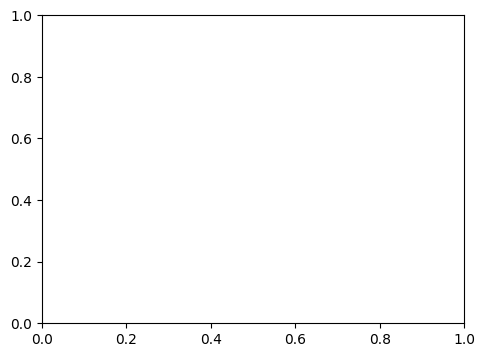

In [ ]:
# @title Detalle de píxeles de una imagen
# 1. HISTOGRAMA DE INTENSIDADES
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(img_gray.ravel(), 256, [0, 256], color='gray')
plt.title('Histograma de Densidades (Aire vs Tejido vs Hueso)')
plt.xlabel('Intensidad de Pixel (0=Negro, 255=Blanco)')
plt.ylabel('Frecuencia')

# 2. DETECCIÓN DE BORDES (Algoritmo Canny)
# Esto resalta cambios bruscos de contraste (bordes de costillas, corazón, diafragma)
edges = cv2.Canny(img_gray, 50, 150)

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Extracción de Características (Bordes/Estructura)')
plt.axis('off')

plt.tight_layout()
plt.show()

---
## 4. NLP: Procesamiento de Lenguaje Natural en Diálogos Clínicos

El "Santo Grial" de la IA médica actual es transcribir y estructurar la conversación médico-paciente.
Veamos cómo un algoritmo básico puede analizar texto crudo.

In [ ]:
# @title Texto ambiguo de conversación
# DATOS NO ESTRUCTURADOS: Transcripción de Consulta
transcripcion = """
Doctor: Buenos días, ¿cuál es el motivo de su visita?
Paciente: Hola doctor. Desde ayer tengo un dolor agudo en el pecho y me cuesta respirar.
Doctor: Entiendo. ¿Ha tenido fiebre?
Paciente: Sí, anoche tuve 38.5 de fiebre y mucha tos seca.
Doctor: De acuerdo. Voy a escuchar sus pulmones. Parece haber sibilancias.
"""

print("--- TEXTO CRUDO (RAW) ---")
print(transcripcion)

# SIMULACIÓN DE EXTRACCIÓN DE ENTIDADES (NER Básico)
# Buscamos palabras clave en el texto (Keyword Spotting)
sintomas_interes = ["dolor", "fiebre", "tos", "disnea", "sibilancias", "respirar"]
hallazgos = []

# Normalizamos texto a minúsculas pa facilitar búsqueda
texto_procesado = transcripcion.lower()

for sintoma in sintomas_interes:
    if sintoma in texto_procesado:
        hallazgos.append(sintoma)

print("\n--- INTELIGENCIA ARTIFICIAL (Extracción de Entidades) ---")
print(f"Síntomas detectados automáticamente: {hallazgos}")
print("Posible clasificación CIE-10 sugerida: J18.9 (Neumonía / Infección Respiratoria)")

--- TEXTO CRUDO (RAW) ---

Doctor: Buenos días, ¿cuál es el motivo de su visita?
Paciente: Hola doctor. Desde ayer tengo un dolor agudo en el pecho y me cuesta respirar.
Doctor: Entiendo. ¿Ha tenido fiebre?
Paciente: Sí, anoche tuve 38.5 de fiebre y mucha tos seca.
Doctor: De acuerdo. Voy a escuchar sus pulmones. Parece haber sibilancias.


--- INTELIGENCIA ARTIFICIAL (Extracción de Entidades) ---
Síntomas detectados automáticamente: ['dolor', 'fiebre', 'tos', 'sibilancias', 'respirar']
Posible clasificación CIE-10 sugerida: J18.9 (Neumonía / Infección Respiratoria)


---
## 5. 🎓 Taller Práctico Autoguiado (Opcional)

Para consolidar lo aprendido, te invitamos a experimentar con estos retos por tu cuenta. No es una tarea evaluada, ¡es para tu curiosidad!

In [ ]:
# RETO 1: Manipulación de Dataframes
# Intenta filtrar e imprimir solo a los pacientes de género Femenino ('F') que tengan Saturación > 95.
# Pista: Usa una lógica similar a la de 'pacientes_criticos' pero cambiando las condiciones.

# Escribe tu código aquí:
# ...

In [ ]:
# RETO 2: Visión Computacional
# Modifica los parámetros de cv2.Canny en la celda anterior (cambia 50, 150 por otros números).
# ¿Qué sucede si pones valores muy altos (ej. 200, 255)? ¿Detecta más o menos bordes?
# Experimenta y observa.

# Escribe sus observaciones como comentario:
# Observación: ...

In [ ]:
# RETO 3: NLP Clínico
# Agrega "fatiga" a la lista de 'sintomas_interes' y modifica la variable 'transcripcion'
# para incluir una frase donde el paciente mencione que se siente cansado.
# Ejecuta el código y verifica si el algoritmo ahora detecta ese nuevo síntoma.

# ...

---
### Cierre de la Sesión

Hoy hemos navegado desde la simplicidad de una tabla Excel hasta la complejidad matricial de una radiografía y la ambigüedad del lenguaje natural.

En la próxima clase profundizaremos en **Tokenización y Embeddings**, la tecnología base detrás de ChatGPT y los LLMs médicos.